In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
data = pd.read_csv(r'D:\数学建模\集训4\cleaned_online_retail.csv')

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 397924 entries, 0 to 397923
Data columns (total 9 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    397924 non-null  int64  
 1   StockCode    397924 non-null  object 
 2   Description  397924 non-null  object 
 3   Quantity     397924 non-null  int64  
 4   InvoiceDate  397924 non-null  object 
 5   UnitPrice    397924 non-null  float64
 6   CustomerID   397924 non-null  float64
 7   Country      397924 non-null  object 
 8   TotalPrice   397924 non-null  float64
dtypes: float64(3), int64(2), object(4)
memory usage: 27.3+ MB


In [6]:
data.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,TotalPrice
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34


In [3]:
basket = (data
          .groupby(['InvoiceNo', 'StockCode'])['Quantity']
          .sum().unstack().reset_index().fillna(0)
          .set_index('InvoiceNo'))

In [33]:
basket

StockCode,10002,10080,10120,10123C,10124A,10124G,10125,10133,10135,11001,...,90214V,90214W,90214Y,90214Z,BANK CHARGES,C2,DOT,M,PADS,POST
InvoiceNo,,,,,,,,,,,,,,,,,,,,,
536365,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
536366,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
536367,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
536368,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
536369,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
581583,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
581584,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
581585,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [4]:
# 将数量大于1的商品标记为1（已购买），否则标记为0
basket1 = basket.applymap(lambda x: 1 if x > 0 else 0)

C:\Users\25492\AppData\Local\Temp\ipykernel_11980\961525181.py:2: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  basket1 = basket.applymap(lambda x: 1 if x > 0 else 0)


In [5]:
from mlxtend.frequent_patterns import fpgrowth
from mlxtend.frequent_patterns import association_rules
# 设置最小支持度（频率）
min_support = 0.01

# 使用FP-Growth算法找出频繁项集
frequent_itemsets = fpgrowth(basket1, min_support=min_support, use_colnames=True)

# 查看结果
frequent_itemsets


D:\Anaconda\Lib\site-packages\mlxtend\frequent_patterns\fpcommon.py:109: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(


,support,itemsets
0,0.106711,(85123A)
1,0.017318,(84029E)
2,0.017210,(84029G)
3,0.016023,(22752)
4,0.013487,(71053)
...,...,...
1026,0.010250,"(23296, 23295)"
1027,0.010898,"(23294, 23293)"
1028,0.010412,"(23294, 23295)"
1029,0.011761,"(23356, 23355)"


In [6]:
# 设定最小置信度
min_confidence = 0.2

# 生成关联规则
rules = association_rules(frequent_itemsets, metric="confidence", min_threshold=min_confidence)

# 查看规则
rules


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
0,(22633),(22865),0.023792,0.030859,0.011275,0.473923,15.357753,0.010541,1.842204,0.957671
1,(22865),(22633),0.030859,0.023792,0.011275,0.365385,15.357753,0.010541,1.538268,0.964654
2,(22633),(22866),0.023792,0.025410,0.010250,0.430839,16.955481,0.009646,1.712327,0.963956
3,(22866),(22633),0.025410,0.023792,0.010250,0.403397,16.955481,0.009646,1.636278,0.965557
4,(22865),(22632),0.030859,0.019368,0.010142,0.328671,16.970061,0.009545,1.460734,0.971038
...,...,...,...,...,...,...,...,...,...,...
968,(23295),(23294),0.019368,0.015699,0.010412,0.537604,34.244111,0.010108,2.128699,0.989971
969,(23356),(23355),0.024223,0.038789,0.011761,0.485523,12.516914,0.010821,1.868327,0.942949
970,(23355),(23356),0.038789,0.024223,0.011761,0.303199,12.516914,0.010821,1.400366,0.957239
971,(23439),(22865),0.020015,0.030859,0.010952,0.547170,17.731363,0.010334,2.140187,0.962875


In [14]:
# 过滤支持度和置信度较高的规则
filtered_rules = rules[(rules['support'] > 0.025) & (rules['confidence'] > 0.4)]

# 显示结果
filtered_rules.sort_values(by='lift', ascending=False)


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
595,(22699),(22697),0.042242,0.037279,0.029186,0.690932,18.534184,0.027612,3.114920,0.987771
594,(22697),(22699),0.037279,0.042242,0.029186,0.782923,18.534184,0.027612,4.412071,0.982679
13,(22726),(22727),0.042566,0.047313,0.028593,0.671736,14.197612,0.026579,2.902200,0.970892
14,(22727),(22726),0.047313,0.042566,0.028593,0.604333,14.197612,0.026579,2.419798,0.975731
35,(82482),(82494L),0.047259,0.043753,0.025248,0.534247,12.210597,0.023180,2.053119,0.963645
34,(82494L),(82482),0.043753,0.047259,0.025248,0.577065,12.210597,0.023180,2.252690,0.960111
282,(22384),(20727),0.050227,0.056754,0.025032,0.498389,8.781497,0.022182,1.880432,0.932985
281,(20727),(22384),0.056754,0.050227,0.025032,0.441065,8.781497,0.022182,1.699254,0.939442
277,(22384),(20725),0.050227,0.069540,0.028215,0.561762,8.078209,0.024723,2.123181,0.922547
276,(20725),(22384),0.069540,0.050227,0.028215,0.405741,8.078209,0.024723,1.598248,0.941696


In [15]:
filtered_rules['antecedents'] = filtered_rules['antecedents'].apply(lambda x: list(x)[0])
filtered_rules['consequents'] = filtered_rules['consequents'].apply(lambda x: list(x)[0])
filtered_rules

C:\Users\25492\AppData\Local\Temp\ipykernel_11980\48699167.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_rules['antecedents'] = filtered_rules['antecedents'].apply(lambda x: list(x)[0])
C:\Users\25492\AppData\Local\Temp\ipykernel_11980\48699167.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_rules['consequents'] = filtered_rules['consequents'].apply(lambda x: list(x)[0])


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
13,22726,22727,0.042566,0.047313,0.028593,0.671736,14.197612,0.026579,2.902200,0.970892
14,22727,22726,0.047313,0.042566,0.028593,0.604333,14.197612,0.026579,2.419798,0.975731
34,82494L,82482,0.043753,0.047259,0.025248,0.577065,12.210597,0.023180,2.252690,0.960111
35,82482,82494L,0.047259,0.043753,0.025248,0.534247,12.210597,0.023180,2.053119,0.963645
54,22386,85099B,0.046990,0.086319,0.029456,0.626866,7.262239,0.025400,2.448666,0.904819
248,22382,20725,0.053302,0.069540,0.025194,0.472672,6.797090,0.021488,1.764480,0.900898
276,20725,22384,0.069540,0.050227,0.028215,0.405741,8.078209,0.024723,1.598248,0.941696
277,22384,20725,0.050227,0.069540,0.028215,0.561762,8.078209,0.024723,2.123181,0.922547
281,20727,22384,0.056754,0.050227,0.025032,0.441065,8.781497,0.022182,1.699254,0.939442
282,22384,20727,0.050227,0.056754,0.025032,0.498389,8.781497,0.022182,1.880432,0.932985


In [16]:
filtered_rules.to_csv('支持度和置信度较高的关联规则.csv')

C:\Users\25492\AppData\Local\Temp\ipykernel_19068\738624078.py:19: DeprecationWarning: `alltrue` is deprecated as of NumPy 1.25.0, and will be removed in NumPy 2.0. Please use `all` instead.
  nx.draw_networkx_edges(G, pos, edge_color=edge_colors, width=2, edge_cmap=cmap.cmap)


ValueError: Unable to determine Axes to steal space for Colorbar. Either provide the *cax* argument to use as the Axes for the Colorbar, provide the *ax* argument to steal space from it, or add *mappable* to an Axes.

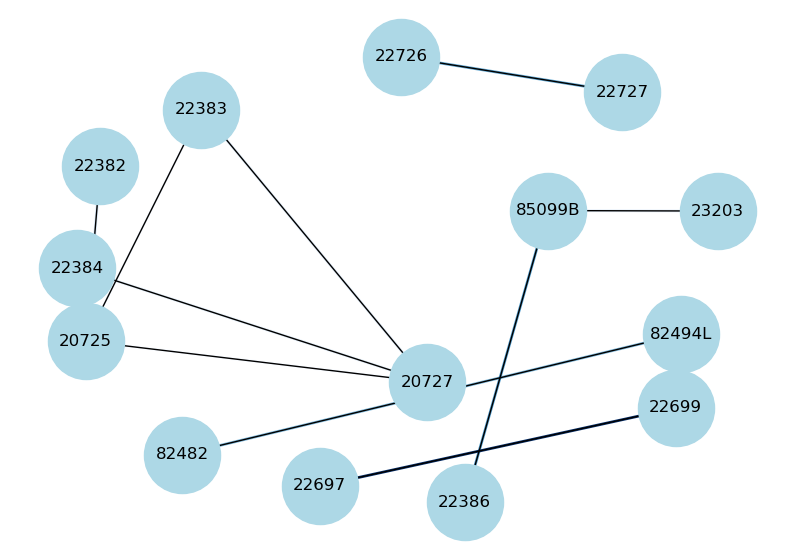

In [162]:
import networkx as nx
import matplotlib.pyplot as plt
import pandas as pd
import matplotlib.cm as cm
import matplotlib.colors as mcolors

# 创建网络图
G = nx.from_pandas_edgelist(filtered_rules, 'antecedents', 'consequents', ['confidence'])

plt.figure(figsize=(10, 7))
pos = nx.spring_layout(G, k=2)

# 获取信心值，并使用 colormap 转换为颜色
edge_colors = [G[u][v]['confidence'] for u, v in G.edges()]
norm = mcolors.Normalize(vmin=min(edge_colors), vmax=max(edge_colors))
cmap = plt.cm.ScalarMappable(norm=norm, cmap=plt.cm.Blues)

# 绘制图形
nx.draw_networkx_edges(G, pos, edge_color=edge_colors, width=2, edge_cmap=cmap.cmap)
nx.draw(G, pos, with_labels=True, node_color='lightblue', node_size=3000)

# 添加颜色条
# 使用 ScalarMappable 对象传递给 colorbar
plt.colorbar(cmap, label='Confidence')
plt.savefig('关联商品.png',dpi=500)
plt.show()


In [9]:
def find_name(data, stock_code):
    stock = data[data['StockCode']==stock_code]['Description'].drop_duplicates()
    stock_name = ''
    for j in range(len(stock)):
        stock_name += stock.iloc[j] + '/'
    stock_name = stock_name[:-1]
    return stock_name

In [72]:
for n in range(2):
    for i in range(filtered_rules.shape[0]):
        stock_code = filtered_rules.iloc[i,n]
        stock_name = find_name(data,stock_code)
        filtered_rules.iloc[i,n] = stock_name

In [99]:
filtered_rules

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
0,ALARM CLOCK BAKELIKE GREEN,ALARM CLOCK BAKELIKE RED,0.042566,0.047313,0.028593,0.671736,14.197612,0.026579,2.902200,0.970892
1,ALARM CLOCK BAKELIKE RED,ALARM CLOCK BAKELIKE GREEN,0.047313,0.042566,0.028593,0.604333,14.197612,0.026579,2.419798,0.975731
4,WOODEN PICTURE FRAME WHITE FINISH,WOODEN FRAME ANTIQUE WHITE,0.047259,0.043753,0.025248,0.534247,12.210597,0.023180,2.053119,0.963645
5,WOODEN FRAME ANTIQUE WHITE,WOODEN PICTURE FRAME WHITE FINISH,0.043753,0.047259,0.025248,0.577065,12.210597,0.023180,2.252690,0.960111
9,JUMBO BAG PINK POLKADOT,JUMBO BAG RED RETROSPOT,0.046990,0.086319,0.029456,0.626866,7.262239,0.025400,2.448666,0.904819
16,LUNCH BAG SPACEBOY DESIGN,LUNCH BAG RED RETROSPOT/LUNCH BAG RED SPOTTY,0.053302,0.069540,0.025194,0.472672,6.797090,0.021488,1.764480,0.900898
22,LUNCH BAG PINK POLKADOT,LUNCH BAG RED RETROSPOT/LUNCH BAG RED SPOTTY,0.050227,0.069540,0.028215,0.561762,8.078209,0.024723,2.123181,0.922547
23,LUNCH BAG RED RETROSPOT/LUNCH BAG RED SPOTTY,LUNCH BAG PINK POLKADOT,0.069540,0.050227,0.028215,0.405741,8.078209,0.024723,1.598248,0.941696
24,LUNCH BAG PINK POLKADOT,LUNCH BAG BLACK SKULL.,0.050227,0.056754,0.025032,0.498389,8.781497,0.022182,1.880432,0.932985
25,LUNCH BAG BLACK SKULL.,LUNCH BAG PINK POLKADOT,0.056754,0.050227,0.025032,0.441065,8.781497,0.022182,1.699254,0.939442


In [10]:
stock_5 = basket.sum(0).sort_values(ascending=False)[:5]
stock_5.name = 'Quantity'
description = []
for i in stock_5.index:
    description.append(find_name(data,i))
description = pd.Series(description, name='Description',index = stock_5.index)

stock_5 = pd.concat([description, stock_5], axis=1)

In [129]:
stock_5

,Description,Quantity
StockCode,,
23843,"PAPER CRAFT , LITTLE BIRDIE",80995.0
23166,MEDIUM CERAMIC TOP STORAGE JAR,77916.0
84077,WORLD WAR 2 GLIDERS ASSTD DESIGNS,54415.0
22197,SMALL POPCORN HOLDER/POPCORN HOLDER,49183.0
85099B,JUMBO BAG RED RETROSPOT,46181.0


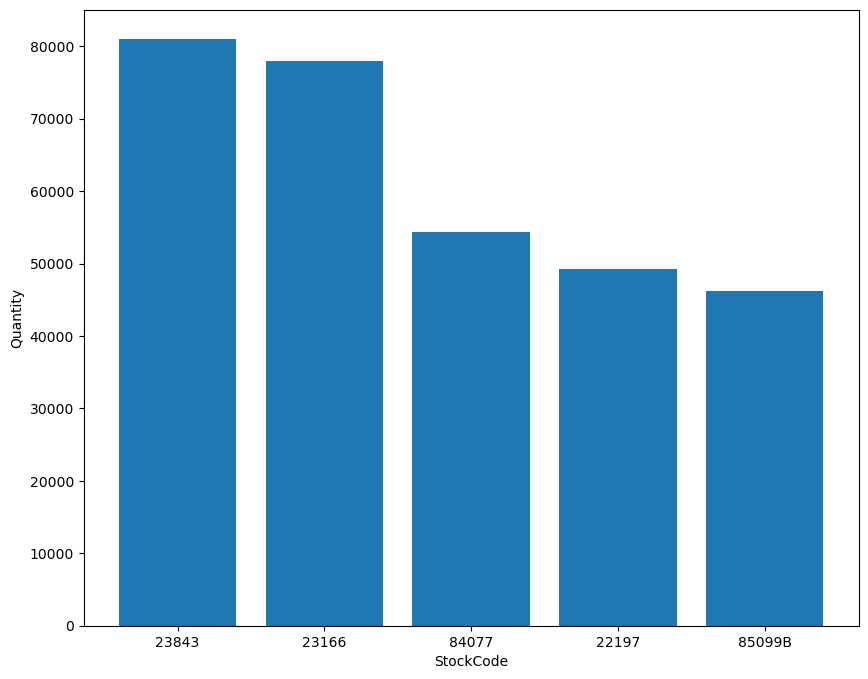

In [139]:
plt.figure(figsize=(10,8))
plt.bar(stock_5.index, stock_5['Quantity'])
plt.xlabel('StockCode')
plt.ylabel('Quantity')
plt.savefig('前五商品数量.png',dpi=500)
plt.show()

In [79]:
c = basket1[stock_5.index]
basket_5

StockCode,23843,23166,84077,22197,85099B
InvoiceNo,,,,,
536365,0,0,0,0,0
536366,0,0,0,0,0
536367,0,0,0,0,0
536368,0,0,0,0,0
536369,0,0,0,0,0
...,...,...,...,...,...
581583,0,0,0,0,0
581584,0,0,0,0,0
581585,0,0,0,0,0


In [83]:
# 计算商品的共现矩阵
co_occurrence_matrix = np.dot(basket_5.T, basket_5)

# 将共现矩阵转换为DataFrame，索引和列为商品名称
co_occurrence_matrix = pd.DataFrame(co_occurrence_matrix, index=basket_5.columns, columns=basket_5.columns)

# 查看共现矩阵
co_occurrence_matrix

StockCode,23843,23166,84077,22197,85099B
StockCode,,,,,
23843,1,0,0,0,0
23166,0,195,4,15,23
84077,0,4,472,72,47
22197,0,15,72,1035,169
85099B,0,23,47,169,1600


In [152]:
co_occurrence_matrix.to_csv('前五商品共现矩阵.csv')

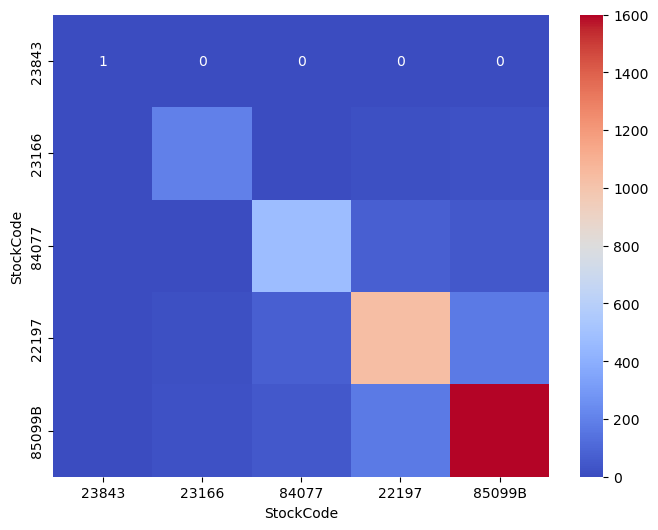

In [161]:
import seaborn as sns

plt.figure(figsize=(8, 6))
sns.heatmap(co_occurrence_matrix, cmap="coolwarm", annot=True, fmt='d')
plt.savefig('前五商品共现矩阵热力图.png',dpi=500)
plt.show()

In [17]:
# 过滤出前五个商品作为前件的关联规则
top_item_rules = rules[rules['antecedents'].apply(lambda x: any(item in x for item in stock_5.index))]
top_item_rules['antecedents'] = top_item_rules['antecedents'].apply(lambda x: list(x)[0])
top_item_rules['consequents'] = top_item_rules['consequents'].apply(lambda x: list(x)[0])
top_item_rules.sort_values(by='lift', ascending=False)

C:\Users\25492\AppData\Local\Temp\ipykernel_11980\2843760214.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  top_item_rules['antecedents'] = top_item_rules['antecedents'].apply(lambda x: list(x)[0])
C:\Users\25492\AppData\Local\Temp\ipykernel_11980\2843760214.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  top_item_rules['consequents'] = top_item_rules['consequents'].apply(lambda x: list(x)[0])


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
890,85099B,23203,0.013757,0.058265,0.010898,0.792157,13.595759,0.010096,4.530989,0.939371
561,22386,85099F,0.029456,0.035283,0.012516,0.424908,12.042970,0.011477,1.677502,0.944794
562,85099F,22386,0.022335,0.046990,0.012516,0.560386,11.925745,0.011467,2.167837,0.937077
921,23203,23202,0.025248,0.041649,0.012192,0.482906,11.594748,0.011141,1.853341,0.937422
83,22411,21931,0.021364,0.041757,0.010088,0.472222,11.308929,0.009196,1.815619,0.931474
922,23202,23203,0.018612,0.058265,0.012192,0.655072,11.242984,0.011108,2.730240,0.928334
79,21931,22386,0.023414,0.046990,0.011869,0.506912,10.787749,0.010769,1.932741,0.929055
84,21931,22411,0.023414,0.042620,0.010088,0.430876,10.109759,0.009091,1.682198,0.922689
145,22411,22386,0.021364,0.046990,0.010142,0.474747,10.103237,0.009139,1.814385,0.920691
362,22384,20725,0.014944,0.069540,0.010088,0.675090,9.707892,0.009049,2.863748,0.910599


In [18]:
top_item_rules.to_csv('前五商品对其他商品的影响.csv')